In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
trn = pd.read_csv('Datasets/Train_data.csv');
tst = pd.read_csv('Datasets/Test_data.csv');

In [3]:
trn.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [4]:
trn.isnull()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
trn.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
trn

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [8]:
trn.shape

(25192, 42)

<Axes: xlabel='class', ylabel='count'>

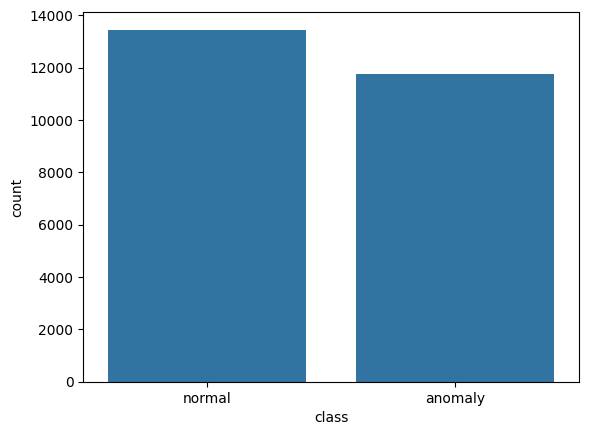

In [9]:
sns.countplot(x = trn['class'])

In [10]:
trn['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [11]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])
le(trn)
le(tst)

In [12]:
trn.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


# Feature Selection

In [13]:
trn_x = trn.drop(['class'], axis=1)
trn_y= trn['class']

In [14]:
# rfc = RandomForestClassifier()

# rfe = RFE(rfc, n_features_to_select=10)
# rfe = rfe.fit(trn_x, trn_y)

# feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), trn_x.columns)]
# selected_features = [v for i, v in feature_map if i==True]

selected_features = ['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate'
 ]

In [15]:
trn_x = trn_x[selected_features]
trn_x.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate
0,1,19,9,491,0,2,1.00,0.00,25,0.17
1,2,41,9,146,0,13,0.08,0.15,1,0.00
2,1,46,5,0,0,123,0.05,0.07,26,0.10
3,1,22,9,232,8153,5,1.00,0.00,255,1.00
4,1,22,9,199,420,30,1.00,0.00,255,1.00


In [16]:
trn_x.shape

(25192, 10)

# Machine Learning Model

In [37]:
scale = StandardScaler()
trn_x = scale.fit_transform(trn_x)
tst = scale.fit_transform(tst)
trn_x

array([[-0.12606067, -0.64538418,  0.75302096, ..., -0.34928194,
        -0.81398452, -0.7791569 ],
       [ 2.21591606,  0.76892549,  0.75302096, ...,  0.49083556,
        -1.03089514, -1.15783086],
       [-0.12606067,  1.09035951, -0.73992391, ...,  0.04277289,
        -0.80494658, -0.93508147],
       ...,
       [-0.12606067,  1.09035951, -2.23286879, ...,  0.04277289,
        -0.92243983, -1.04645617],
       [-0.12606067,  0.57606508, -0.73992391, ..., -0.01323494,
        -0.85917423, -0.97963135],
       [-0.12606067, -0.77395779, -0.73992391, ...,  0.26680423,
        -0.59707391, -0.73460702]])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(trn_x, trn_y, train_size=0.80)

In [36]:
x_train.shape
x_test

array([[-2.4680374 , -1.031105  ,  0.75302096, ..., -0.34928194,
         1.05686953,  1.06966306],
       [-2.4680374 , -1.031105  ,  0.75302096, ..., -0.34928194,
        -0.85013629,  1.06966306],
       [-0.12606067, -0.45252377,  0.75302096, ..., -0.34928194,
         1.26474221,  1.06966306],
       ...,
       [-0.12606067,  1.09035951, -0.73992391, ..., -0.01323494,
        -0.98570542, -1.11328098],
       [-0.12606067, -0.45252377,  0.75302096, ..., -0.34928194,
         1.26474221,  1.06966306],
       [-0.12606067,  1.60465394, -0.73992391, ..., -0.06924277,
        -0.81398452, -0.93508147]])

In [20]:
x_test.shape

(5039, 10)

In [21]:
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.025767087936401367


In [22]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.0024461746215820312


In [23]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [24]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

/home/linux/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=14, state=TrialState.COMPLETE, values=[0.9958325064496923], datetime_start=datetime.datetime(2024, 11, 21, 16, 31, 0, 136754), datetime_complete=datetime.datetime(2024, 11, 21, 16, 31, 0, 165931), params={'dt_max_depth': 15, 'dt_max_features': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=14, value=None)


In [26]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 0.9998015183843596
Test Score: 0.9944433419329232


In [27]:
# SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

In [28]:
from sklearn.model_selection import cross_val_score
models = dtc

In [29]:
scores = {}
scores["Dec"]={}
for scorer in ['precision','recall']:
  scores["Dec"][scorer] = cross_val_score(models, x_train, y_train, cv=10, scoring=scorer)

In [30]:
def line(name):
  return '*'*(25-len(name)//2)

print(line("Dec"), "Decision Tree", 'Model Validation', line("Dec"))
for scorer in ['precision','recall']:
  mean = round(np.mean(scores["Dec"][scorer])*100,2)
  stdev = round(np.std(scores["Dec"][scorer])*100,2)
  print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
  print()

************************ Decision Tree Model Validation ************************
Mean precision: 
 99.52 % +- 0.22

Mean recall: 
 99.48 % +- 0.34



In [31]:
models.fit(x_train, y_train)
preds = models.predict(x_test)
print("Predicted","Test");
y_test = y_test.to_numpy()
alerts = []
for i in range(10):
    if(preds[i] == 1):
        alerts.append(preds[i])
    print("  ",preds[i],"\t  ",y_test[i])
print(type(y_test));
print("No of alerts: ",len(alerts))

Predicted Test
   1 	   1
   0 	   0
   1 	   1
   1 	   1
   0 	   0
   0 	   0
   1 	   1
   0 	   0
   1 	   1
   1 	   1
<class 'numpy.ndarray'>
No of alerts:  6


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]

print(line("Dec"), "Decision Tree", 'Model Testing', line("Dec"))
print(confusion_matrix(y_test, preds))
print(line("Dec",'-'))
print(classification_report(y_test, preds, target_names=target_names))

************************ Decision Tree Model Testing ************************
[[2303   19]
 [   5 2712]]
------------------------
              precision    recall  f1-score   support

      normal       1.00      0.99      0.99      2322
     anamoly       0.99      1.00      1.00      2717

    accuracy                           1.00      5039
   macro avg       1.00      0.99      1.00      5039
weighted avg       1.00      1.00      1.00      5039



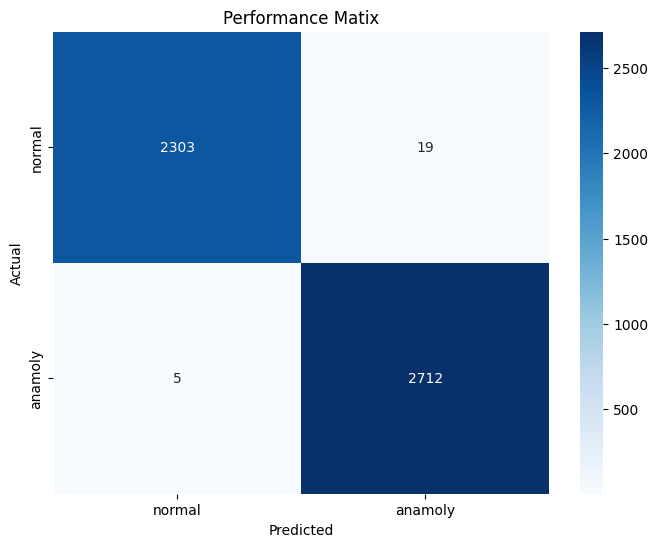

In [33]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, target_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Performance Matix')
    plt.show()


plot_confusion_matrix(y_test, preds, target_names)

In [34]:
import joblib
models.fit(x_train, y_train)
joblib.dump(models, 'model.joblib')

['model.joblib']